In [2]:
import kagglehub
import pandas as pd
import os
# Download latest version
path = kagglehub.dataset_download("anjaneyatripathi/emotion-classification-nlp")

print("Path to dataset files:", path)
print(os.listdir(path))

csv_file1 = os.path.join(path, "emotion-labels-val.csv")
csv_file2 = os.path.join(path, "emotion-labels-test.csv")
csv_file3 = os.path.join(path, "emotion-labels-train.csv")

df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)
df3 = pd.read_csv(csv_file3)

Path to dataset files: /kaggle/input/emotion-classification-nlp
['emotion-labels-train.csv', 'emotion-labels-val.csv', 'emotion-labels-test.csv', '.nfs0000000017c590620000000e']


In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stems = [stemmer.stem(word) for word in tokens]
    # Lemmatization
    lemmas = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens, stems, lemmas





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


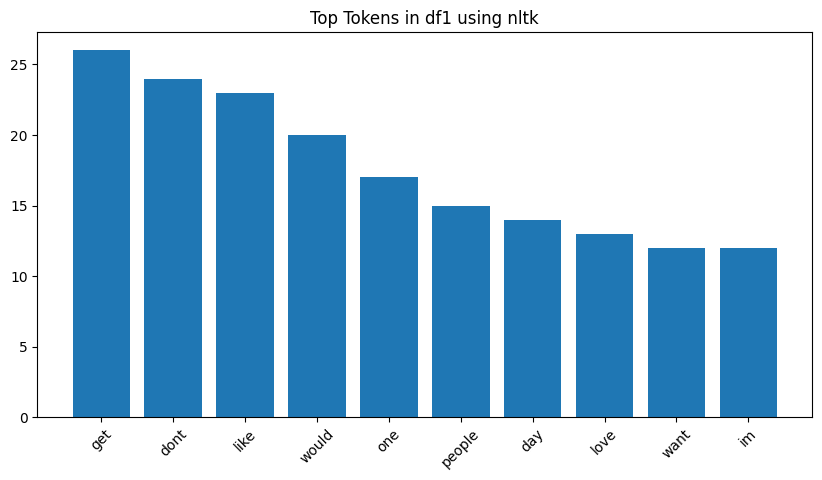

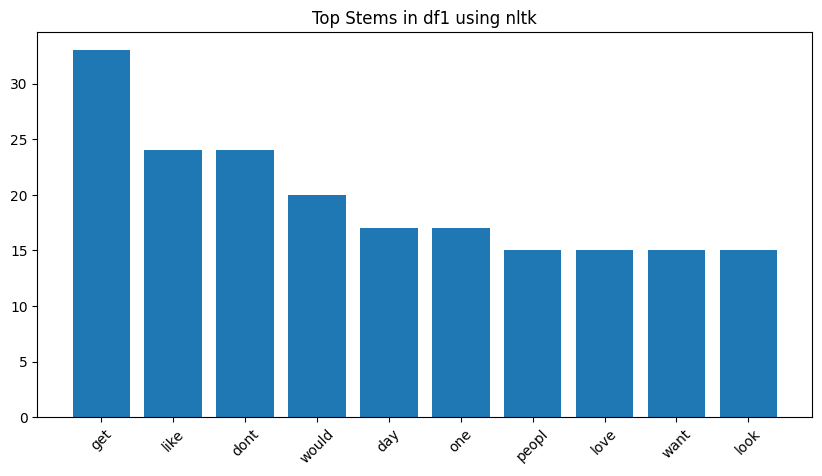

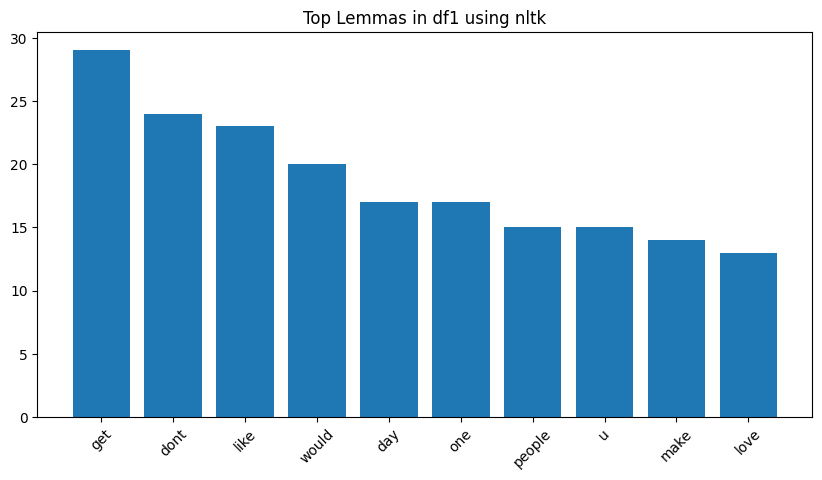

In [4]:
import matplotlib.pyplot as plt
from collections import Counter


df1['tokens'], df1['stems'], df1['lemmas'] = zip(*df1['text'].map(preprocess))

# Example for df1 tokens
token_counts_1 = Counter([token for tokens in df1['tokens'] for token in tokens])
stem_counts_1 = Counter([stem for stems in df1['stems'] for stem in stems])
lemma_counts_1 = Counter([lemma for lemmas in df1['lemmas'] for lemma in lemmas])

def plot_top_words(counter, title, n=10):
    common = counter.most_common(n)
    words, counts = zip(*common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()


plot_top_words(token_counts_1, 'Top Tokens in df1 using nltk')
plot_top_words(stem_counts_1, 'Top Stems in df1 using nltk')
plot_top_words(lemma_counts_1, 'Top Lemmas in df1 using nltk')

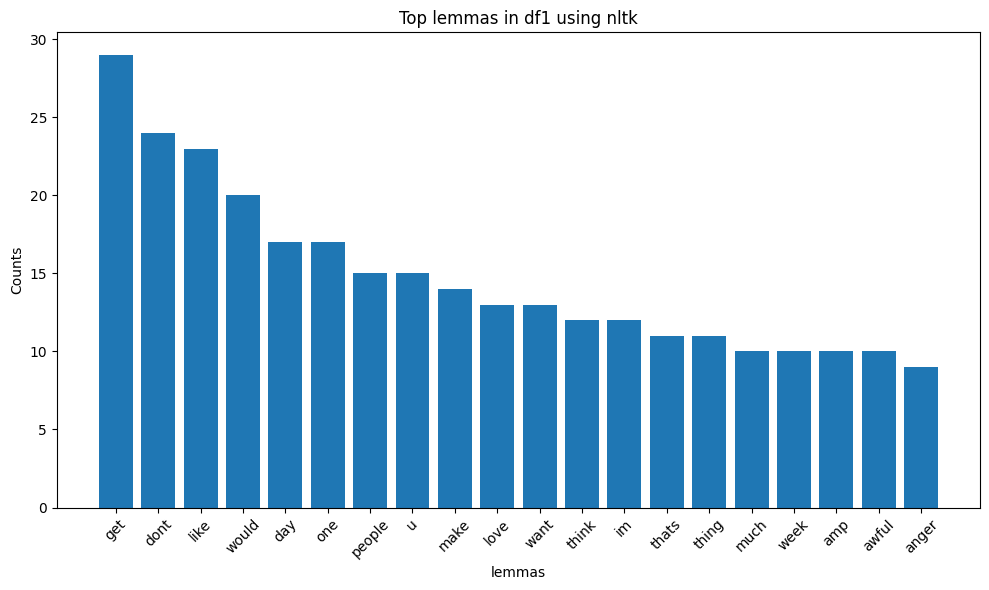

In [11]:
import matplotlib.pyplot as plt

def plot_top_words(token_counts, title, filename='df1_top_lemmas.png'):
    # Example plotting code; adjust as needed for your data structure
    top_tokens = token_counts.most_common(20)  # or however many you want
    tokens, counts = zip(*top_tokens)
    plt.figure(figsize=(10,6))
    plt.bar(tokens, counts)
    plt.title(title)
    plt.xlabel('lemmas')
    plt.ylabel('Counts')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(filename)  # Save the plot to a file
    plt.show()

# Usage:
plot_top_words(lemma_counts_1, 'Top lemmas in df1 using nltk', filename='df1_top_lemmas.png')


In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.text for token in doc if not token.is_punct and not token.is_space]
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    tokens_no_stop = [token.text for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    lemmas_no_stop = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]
    return tokens, lemmas, tokens_no_stop, lemmas_no_stop

def plot_top_words(counter, title, n=10):
    common = counter.most_common(n)
    words, counts = zip(*common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

#for dataframe 1

df1['spacy_tokens'], df1['spacy_lemmas'], df1['spacy_tokens_nostop'],df1['spacy_lemmas_nostop'] = zip(*df1['text'].map(spacy_preprocess))



# Example for df1
token_counts = Counter([token for tokens in df1['spacy_tokens_nostop'] for token in tokens])
lemma_counts = Counter([lemma for lemmas in df1['spacy_lemmas_nostop'] for lemma in lemmas])

plot_top_words(token_counts, 'Top spaCy Tokens (No Stopwords) in df1')
plot_top_words(lemma_counts, 'Top spaCy Lemmas (No Stopwords) in df1')


In [ ]:
def plot_top_words(counter, title, n=10, filename=None):
    common = counter.most_common(n)
    words, counts = zip(*common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()  # Optional: improves layout for saving

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')  # Save the plot
    plt.show()
plot_top_words(token_counts, 'Top spaCy Tokens (No Stopwords) in df1', filename='df1_spacy_tokens.png')
plot_top_words(lemma_counts, 'Top spaCy Lemmas (No Stopwords) in df1', filename='df1_spacy_lemmas.png')

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

#for dataframe 2

df2['spacy_tokens'], df2['spacy_lemmas'], df2['spacy_tokens_nostop'],df2['spacy_lemmas_nostop'] = zip(*df2['text'].map(spacy_preprocess))



# Example for df1
token_counts_2 = Counter([token for tokens in df2['spacy_tokens_nostop'] for token in tokens])
lemma_counts_2 = Counter([lemma for lemmas in df2['spacy_lemmas_nostop'] for lemma in lemmas])

plot_top_words(token_counts_2, 'Top spaCy Tokens (No Stopwords) in df2')
plot_top_words(lemma_counts_2, 'Top spaCy Lemmas (No Stopwords) in df2')

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


df2['tokens'], df2['stems'], df2['lemmas'] = zip(*df2['text'].map(preprocess))

# Example for df2 tokens
token_counts_2 = Counter([token for tokens in df2['tokens'] for token in tokens])
stem_counts_2 = Counter([stem for stems in df2['stems'] for stem in stems])
lemma_counts_2 = Counter([lemma for lemmas in df2['lemmas'] for lemma in lemmas])

def plot_top_words(counter, title, n=10):
    common = counter.most_common(n)
    words, counts = zip(*common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(token_counts_2, 'Top Tokens in df2')
plot_top_words(stem_counts_2, 'Top Stems in df2')
plot_top_words(lemma_counts_2, 'Top Lemmas in df2')

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter


df3['tokens'], df3['stems'], df3['lemmas'] = zip(*df3['text'].map(preprocess))

# Example for df2 tokens
token_counts_3 = Counter([token for tokens in df3['tokens'] for token in tokens])
stem_counts_3 = Counter([stem for stems in df3['stems'] for stem in stems])
lemma_counts_3 = Counter([lemma for lemmas in df3['lemmas'] for lemma in lemmas])

def plot_top_words(counter, title, n=10):
    common = counter.most_common(n)
    words, counts = zip(*common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_words(token_counts_3, 'Top Tokens in df3')
plot_top_words(stem_counts_3, 'Top Stems in df3')
plot_top_words(lemma_counts_3, 'Top Lemmas in df3')

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

#for dataframe 2

df3['spacy_tokens'], df3['spacy_lemmas'], df3['spacy_tokens_nostop'],df3['spacy_lemmas_nostop'] = zip(*df3['text'].map(spacy_preprocess))



# Example for df1
token_counts_3 = Counter([token for tokens in df3['spacy_tokens_nostop'] for token in tokens])
lemma_counts_3 = Counter([lemma for lemmas in df3['spacy_lemmas_nostop'] for lemma in lemmas])

plot_top_words(token_counts_3, 'Top spaCy Tokens (No Stopwords) in df3')
plot_top_words(lemma_counts_3, 'Top spaCy Lemmas (No Stopwords) in df3')

In [38]:
sample_text = df1['text'].iloc[0]  # or from df2/df3
print(sample_text)

@theclobra lol I thought maybe, couldn't decide if there was levity or not


In [39]:

# NLTK
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
tokens_nltk = word_tokenize(sample_text)
stems_nltk = [PorterStemmer().stem(word) for word in tokens_nltk]
lemmas_nltk = [WordNetLemmatizer().lemmatize(word) for word in tokens_nltk]

sample_text = df1['text'].iloc[0]  # or from df2/df3
print(sample_text)
print(tokens_nltk)
print(stems_nltk)
print(lemmas_nltk)

@theclobra lol I thought maybe, couldn't decide if there was levity or not
['@', 'theclobra', 'lol', 'I', 'thought', 'maybe', ',', 'could', "n't", 'decide', 'if', 'there', 'was', 'levity', 'or', 'not']
['@', 'theclobra', 'lol', 'i', 'thought', 'mayb', ',', 'could', "n't", 'decid', 'if', 'there', 'wa', 'leviti', 'or', 'not']
['@', 'theclobra', 'lol', 'I', 'thought', 'maybe', ',', 'could', "n't", 'decide', 'if', 'there', 'wa', 'levity', 'or', 'not']


In [40]:
# spaCy
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)
tokens_spacy = [token.text for token in doc]
lemmas_spacy = [token.lemma_ for token in doc]

sample_text = df1['text'].iloc[0]  # or from df2/df3
print(sample_text)
print(tokens_spacy)
print(lemmas_spacy)

@theclobra lol I thought maybe, couldn't decide if there was levity or not
['@theclobra', 'lol', 'I', 'thought', 'maybe', ',', 'could', "n't", 'decide', 'if', 'there', 'was', 'levity', 'or', 'not']
['@theclobra', 'lol', 'I', 'think', 'maybe', ',', 'could', 'not', 'decide', 'if', 'there', 'be', 'levity', 'or', 'not']


In [1]:
#task 3 pretrained bert model

from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
model_name = "dslim/bert-base-NER"  # You can also use "dbmdz/bert-large-cased-finetuned-conll03-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

sentences = [
    "Apple released the new iPhone 15 in September 2024.",
    "Barack Obama visited Berlin to attend a climate summit.",
    "I absolutely loved the food at Le Bernardin in New York!",
    "Tesla’s stock price soared after the announcement by Elon Musk.",
    "The Amazon rainforest is facing unprecedented wildfires this year.",
    "Taylor Swift’s concert in London was a huge success.",
    "Microsoft acquired a startup based in San Francisco last month.",
    "The Mona Lisa is displayed at the Louvre in Paris.",
    "Pfizer developed a new vaccine for the flu in 2025.",
    "I was disappointed with the customer service at the hotel."
]
for i, sentence in enumerate(sentences, 1):
    print(f"\nSentence {i}: {sentence}")
    entities = ner_pipeline(sentence)
    for entity in entities:
        print(f"  - Entity: '{entity['word']}', Type: {entity['entity_group']}, Score: {entity['score']:.2f}")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu



Sentence 1: Apple released the new iPhone 15 in September 2024.
  - Entity: 'Apple', Type: ORG, Score: 1.00
  - Entity: 'iPhone 15', Type: MISC, Score: 1.00

Sentence 2: Barack Obama visited Berlin to attend a climate summit.
  - Entity: 'Barack Obama', Type: PER, Score: 1.00
  - Entity: 'Berlin', Type: LOC, Score: 1.00

Sentence 3: I absolutely loved the food at Le Bernardin in New York!
  - Entity: 'Le Bernardin', Type: LOC, Score: 0.78
  - Entity: 'New York', Type: LOC, Score: 1.00

Sentence 4: Tesla’s stock price soared after the announcement by Elon Musk.
  - Entity: 'Tesla', Type: ORG, Score: 0.98
  - Entity: 'El', Type: ORG, Score: 1.00
  - Entity: '##on', Type: PER, Score: 0.87
  - Entity: 'Musk', Type: ORG, Score: 0.97

Sentence 5: The Amazon rainforest is facing unprecedented wildfires this year.
  - Entity: 'Amazon', Type: LOC, Score: 0.98

Sentence 6: Taylor Swift’s concert in London was a huge success.
  - Entity: 'Taylor Swift', Type: PER, Score: 1.00
  - Entity: 'London

In [3]:
from transformers import pipeline

# Load a transformer sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Get sentiment results for each sentence
sentiment_results = [sentiment_pipeline(sentence)[0] for sentence in sentences]


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [4]:
import pandas as pd

# Prepare data for visualization
data = []
for i, sentence in enumerate(sentences):
    # Format NER entities as "word (type)"
    entities = "; ".join([f"{ent['word']} ({ent['entity_group']})" for ent in ner_pipeline(sentence)])
    sentiment = sentiment_results[i]['label']
    score = sentiment_results[i]['score']
    data.append({
        "Sentence": sentence,
        "Entities": entities,
        "Sentiment": sentiment,
        "Sentiment Score": round(score, 2)
    })

df = pd.DataFrame(data)
print(df)


                                            Sentence  \
0  Apple released the new iPhone 15 in September ...   
1  Barack Obama visited Berlin to attend a climat...   
2  I absolutely loved the food at Le Bernardin in...   
3  Tesla’s stock price soared after the announcem...   
4  The Amazon rainforest is facing unprecedented ...   
5  Taylor Swift’s concert in London was a huge su...   
6  Microsoft acquired a startup based in San Fran...   
7  The Mona Lisa is displayed at the Louvre in Pa...   
8  Pfizer developed a new vaccine for the flu in ...   
9  I was disappointed with the customer service a...   

                                            Entities Sentiment  \
0                      Apple (ORG); iPhone 15 (MISC)  POSITIVE   
1                   Barack Obama (PER); Berlin (LOC)  POSITIVE   
2                 Le Bernardin (LOC); New York (LOC)  POSITIVE   
3      Tesla (ORG); El (ORG); ##on (PER); Musk (ORG)  POSITIVE   
4                                       Amazon (LOC) 

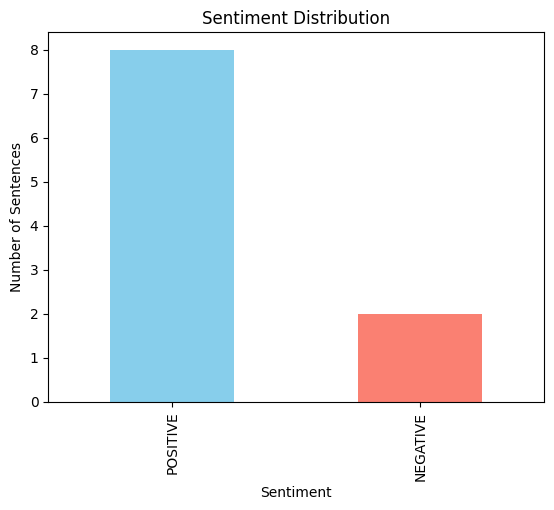

In [6]:
import matplotlib.pyplot as plt

# Count sentiment labels
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentences")

# Save the plot to a file before showing it
plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')  # You can change the filename and format

plt.show()


In [1]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 363.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0

In [25]:
#task 4 gensim
from gensim.models import Word2Vec
corpus = [
    ["the", "dog", "barked", "at", "the", "mailman"],
    ["the", "cat", "slept", "on", "the", "windowsill"],
    ["dogs", "and", "cats", "are", "popular", "pets"],
    ["the", "puppy", "chewed", "the", "shoe"],
    ["the", "kitten", "chased", "the", "ball", "of", "yarn"],
    ["the", "cat", "purred", "when", "it", "was", "happy"]
]
# Train Word2Vec model
model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, workers=2, sg=0)
similar_words = model.wv.most_similar("dog", topn=5)
print("Words most similar to 'dog':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.2f}")


Words most similar to 'dog':
purred: 0.23
cats: 0.19
popular: 0.13
when: 0.06
of: 0.05


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("leadbest/googlenewsvectorsnegative300")

print("Path to dataset files:", path)


100%|██████████| 3.17G/3.17G [00:41<00:00, 83.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2


In [12]:
from gensim.models import KeyedVectors

path = '/root/.cache/kagglehub/datasets/leadbest/googlenewsvectorsnegative300/versions/2/GoogleNews-vectors-negative300.bin'
model_1 = KeyedVectors.load_word2vec_format(path, binary=True)

similar_words = model_1.most_similar("dog", topn=5)
print("Words most similar to 'dog':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.2f}").
    # for a bigger dataset i used a built-in dataset to use word2vec but I used google dataset which doesnot have
    # neural network weights and vocabulary structures needed for further training so this case is not needed.


Words most similar to 'dog':
dogs: 0.87
puppy: 0.81
pit_bull: 0.78
pooch: 0.76
cat: 0.76
